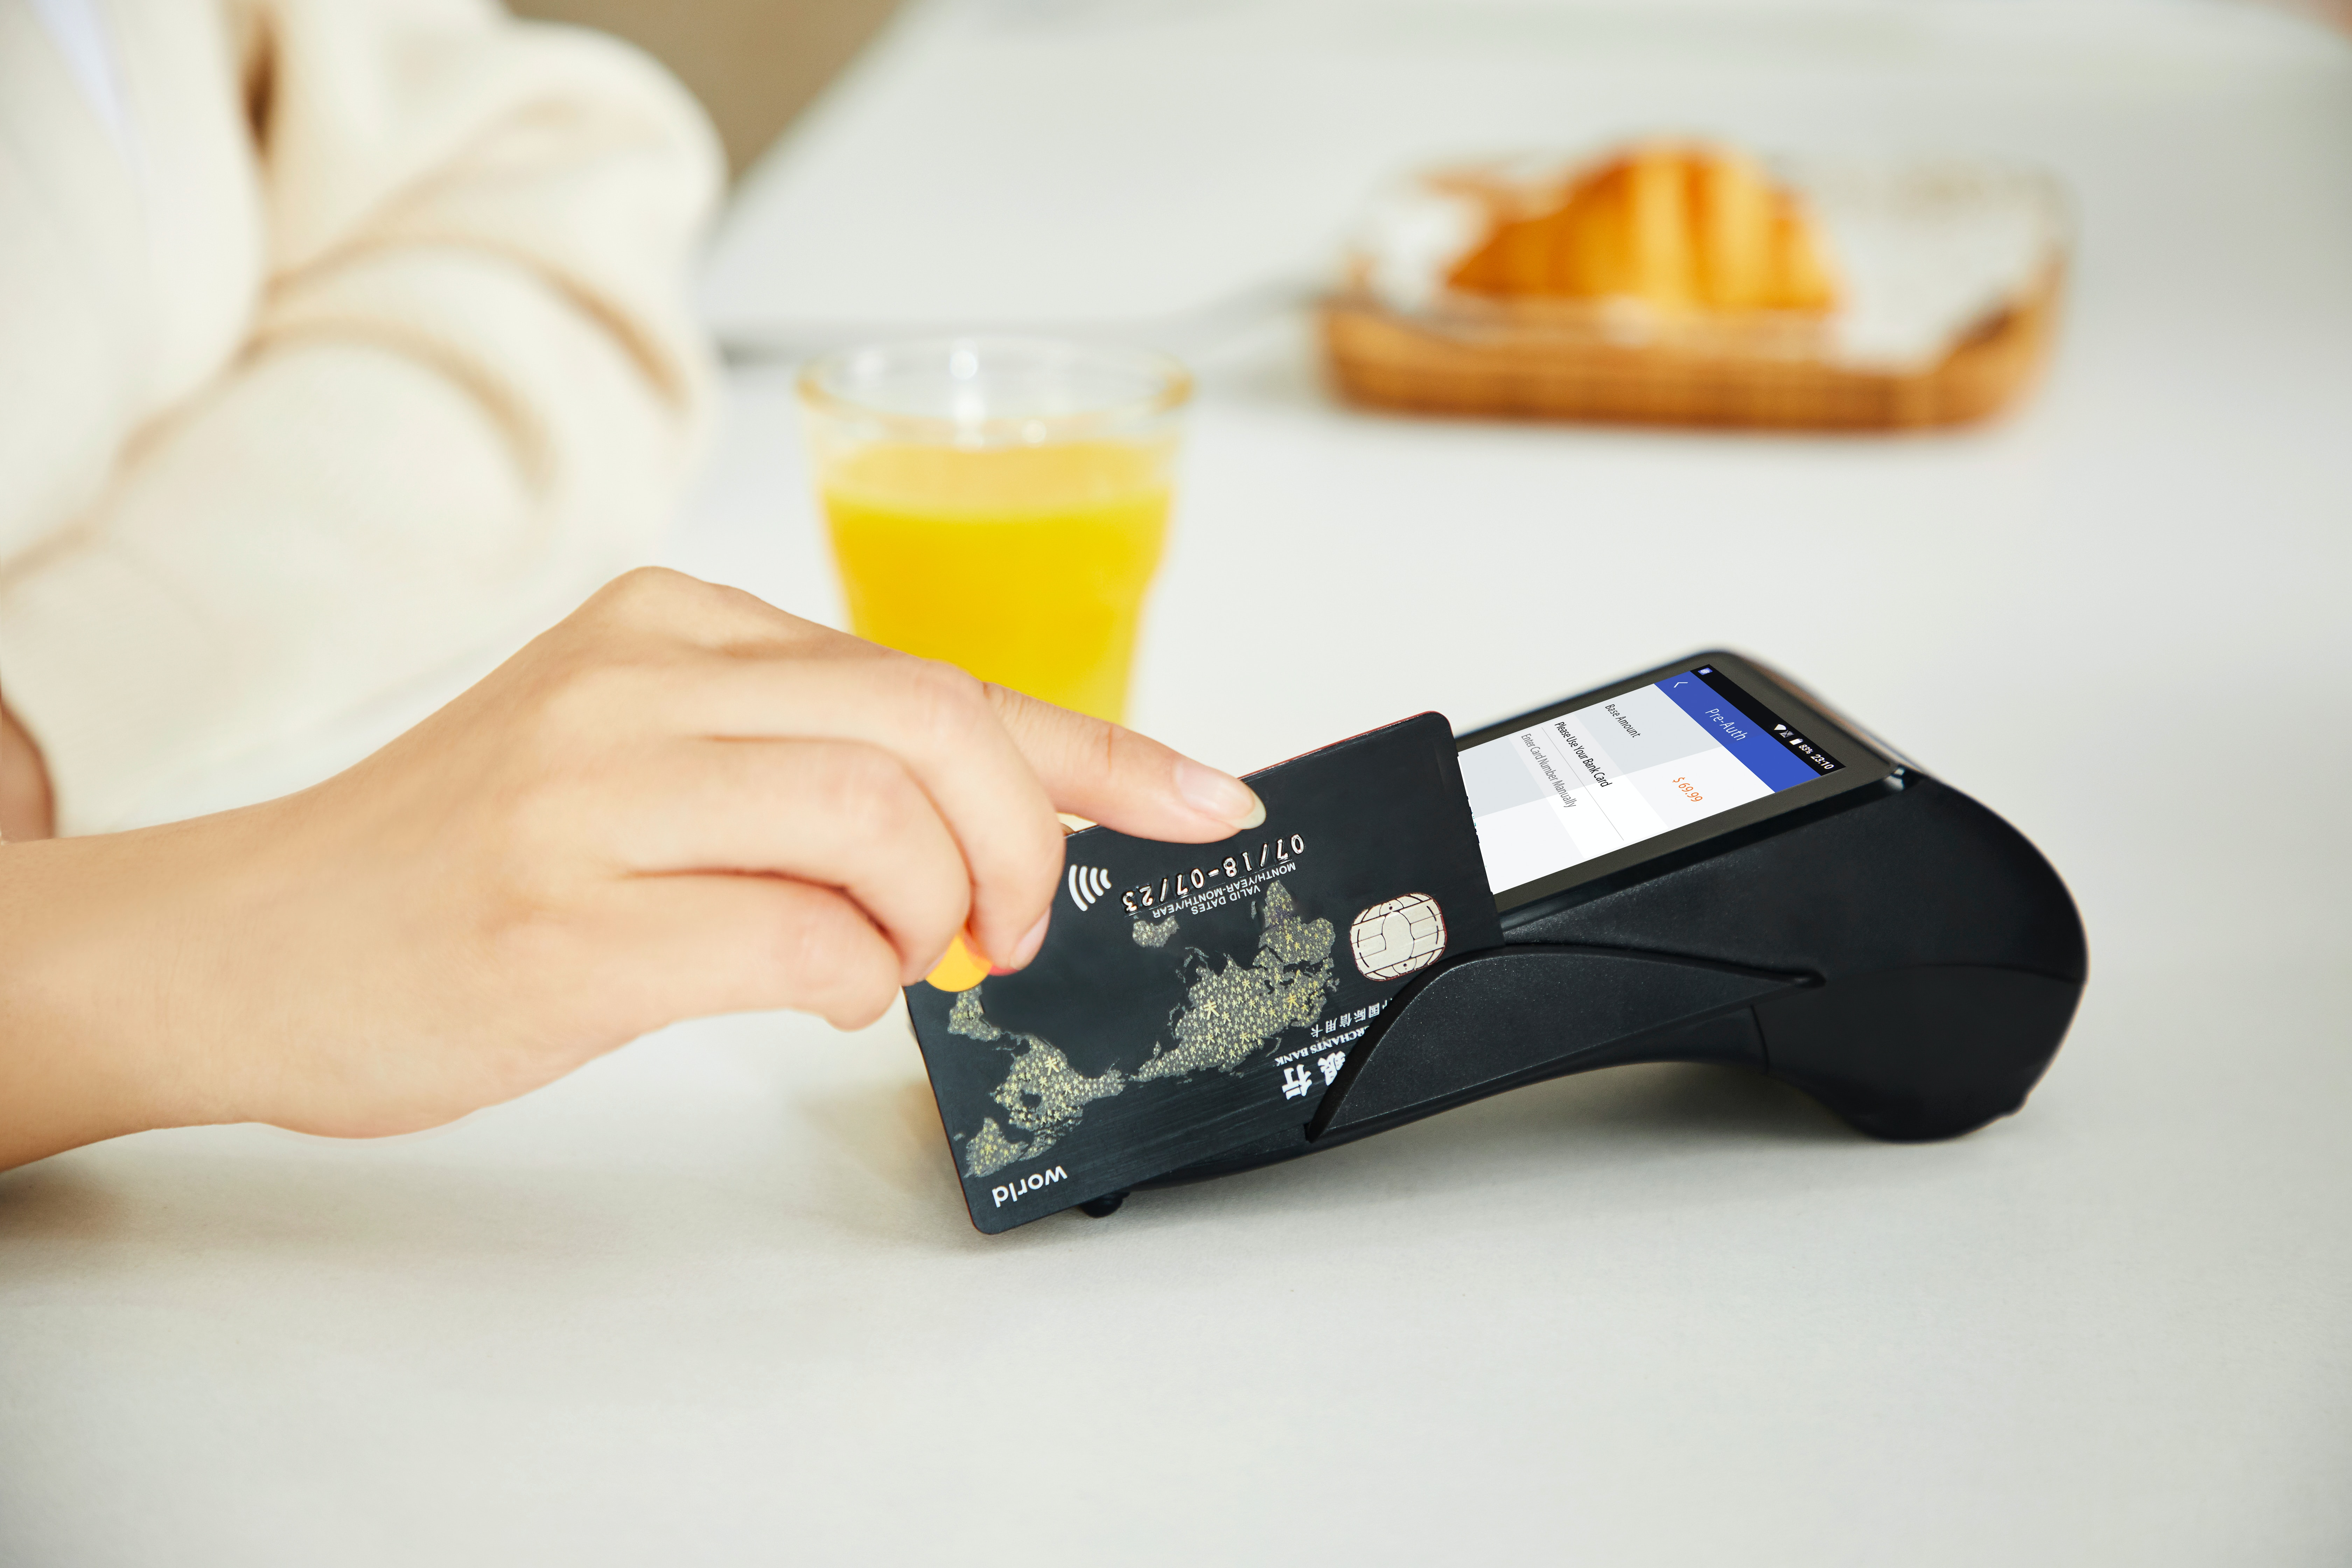


# Predicting Credit Card Approvals

Credit card acceptance is a critical stage for commercial banks when offering loans. A person's creditworthiness is determined by several factors when applying for a credit card, including their credit score, income, employment status, and debt-to-income ratio. The information provided is utilised by the bank in deciding whether or not to grant the credit card application.\
In the past, credit card applications had to be manually reviewed by bank staff, which took a considerable amount of time. Machine learning has made it possible to automate this task, making it easier and faster for financial institutions to approve credit card applications.

**This is a guided project which is part of Data Scientist career track from Datacamp .**\
\
We'll use the [Credit Card Approval dataset](https://archive-beta.ics.uci.edu/dataset/27/credit+approval) from the UCI Machine Learning Repository.\
To ensure the confidentiality of the data, the values in the dataset have been replaced by random symbols. Because we are not using this data to create actual credit screening criteria, this will still serve our needs as an example dataset.

## Exploratory Data Analysis

Let's investigate the dataset's attributes and examine for issues that need to be addressed.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# read and load the data
df = pd.read_csv('~/Documents/Datasets/credit_data.csv', header=None)
df.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


This [blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) gives us a pretty good overview of the probable features. The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

For easier understanding, I will rename the columns to correspond their probable features.

In [3]:
new_col = ['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 
           'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
df.columns = new_col

In [4]:
# check new columns
df.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus'],
      dtype='object')

In [5]:
df.shape

(690, 16)

There are 690 instances and 16 featues inwhich the first 15 are credit card attributes and the last one is our target variable

In [6]:
# Print summary statistics
print(df.describe())

print('\n')

# Print DataFrame information
print(df.info())

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-

**Feature selection**\
\
Features like DriversLicense and ZipCode are not as important as the other features in the dataset for predicting credit card approvals. To get a better sense, we can measure their statistical correlation to the labels of the dataset. But this is out of scope for this project. We should drop them to design our machine learning model with the best set of features.

In [7]:
df = df.drop(['DriversLicense', 'ZipCode'], axis=1)

**Handling null values**\
\
The missing values in the dataset are labeled with '?'. We'll replace it with NaN

In [8]:
# Replace the '?'s with NaN
df = df.replace('?', np.nan)

In [9]:
# Impute the missing values with mean imputation
df.fillna(df.mean(numeric_only=True), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(df.isna().sum())

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
Citizen            0
Income             0
ApprovalStatus     0
dtype: int64


We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed. All of these columns contain non-numeric data and this is why the mean imputation strategy would not work here. This needs a different treatment.

In [10]:
# iterate through each column, check if they are object type and Impute with the most frequent value
for col in df.columns:
    if df[col].dtype == 'object':
        df = df.fillna(df[col].mode()[0])
        
# Count the number of NaNs in the datasets and print the counts to verify
print(df.isna().sum())

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64


## Splitting the dataset into train and test sets

In [11]:
# Split into train and test sets`
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [12]:
#check shape
print(df_train.shape)
print(df_test.shape)

(462, 14)
(228, 14)


## Preprocessing the data

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model.
1. Convert the non-numeric data into numeric.
2. Scale the feature values to a uniform range.

In [13]:
# Convert the categorical features in the train and test sets independently
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

# Reindex the columns of the test set aligning with the train set
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

In [14]:
#check shape
print(df_train.shape)
print(df_test.shape)

(462, 324)
(228, 324)


Now, let's try to understand what these scaled values mean in the real world. Let's use CreditScore as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a CreditScore of 1 is the highest since we're rescaling all the values to the range of 0-1.

In [15]:
# Segregate features and labels into separate variables
X_train, y_train = df_train.iloc[:,:-1].values, df_train.iloc[:, [-1]].values.ravel()
X_test, y_test = df_test.iloc[:,:-1].values, df_test.iloc[:, [-1]].values.ravel()

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
resacledX_train = scaler.fit_transform(X_train)
resacledX_test = scaler.fit_transform(X_test)

In [16]:
#check shape
print(resacledX_train.shape)
print(resacledX_test.shape)

(462, 323)
(228, 323)


## Logistic Regression
\
Predicting whether or not a credit card application will be approved is, at its core, a classification task. Our dataset has more "Denied" status instances than "Approved" status instances, at least according to UCI. Specifically, 383 applications (55.5% of total) were rejected, while 307 (44.5% of total) were approved.\
This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.\
\
We will assume that the features that affect the credit card approval decision process correlated with each other. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).

In [17]:
# Instantiate a LogisticRegression
logreg = LogisticRegression()

# fit the model to the train data
logreg.fit(resacledX_train, y_train)

LogisticRegression()

## Predicting and Evaluating Performance

We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix. It is crucial to verify if our machine learning model can predict both approved and rejected credit card applications with comparable accuracy, given the relative frequencies of both labels in the original dataset. Our model may approve an application that shouldn't have been approved if it's not performing well. 

In [18]:
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(resacledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(resacledX_test, y_test))

#print confusion matrix
print(confusion_matrix(y_test, y_pred))      

Accuracy of logistic regression classifier:  0.8464912280701754
[[94  9]
 [26 99]]


The logistic regression classifier correctly predicted the target variable for **84.65%** of the samples in the test set.

## Grid searching and making the model perform better

We can perform a grid search of the model parameters to improve the model's ability to predict credit card approvals.\
\
scikit-learn's implementation of logistic regression consists of different hyperparameters but we will grid search over the following two:
- tol
- max_iter

In [19]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(resacledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(resacledX_test, y_test))

Best: 0.863558 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.8464912280701754


The accuracy of the logistic regression classifier did not change even though the best hyperparameters were found to be {'max_iter': 100, 'tol': 0.01} with an accuracy of 0.863558.\
There could be several reasons why the accuracy did not change:
- The difference in accuracy between the best hyperparameters and the default hyperparameters may not be significant enough to cause a noticeable change in the accuracy.
- The dataset may not be large enough to detect a significant difference in accuracy between different hyperparameters.
- The logistic regression algorithm may not be the best choice for the dataset, and other algorithms may perform better.
- The evaluation metric used (accuracy) may not be the most appropriate metric for the problem, and other metrics such as precision, recall, or F1 score may be more informative.